<div style="max-width:66ch;">

# Lecture notes - Data storytelling

This is a lecture note on **data storytelling** where we'll be using matplotlib and customize it towards better storytelling to get higher impact with your visuals. The principles are the same for other plotting libraries such as plotly, but the syntax are different. You are encouraged to implement these concepts in plotly as well.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to data storytelling, you are encouraged to read further into the subject. </p>

Read more

- [storytelling with data - C. N. Knaflic (2023)](https://www.storytellingwithdata.com/)
- [storytelling with data book - C. N. Knaflic (2015)](https://www.adlibris.com/se/bok/storytelling-with-data-9781119002253)

</div>


<div style="max-width:66ch;">

## Setup

We'll start with two datasets, where one will graphed as line chart and the other as bar chart. Usually before deciding upon a graphic to use you should first start with exploratory data analysis to find out useful insights. Thereafter you choose to emphasize on your insights and try using the visuals to support and strengthen your message. Now you've entered the domain of explanatory data analysis.

- [CO2 data - pick annual mean data](https://gml.noaa.gov/ccgg/trends/data.html)

- [CO2 emissions by country]("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/")

<p class = "alert alert-info" role="alert"><b>Note</b> that we'll be copying code to several cells to in order to show the progression. There is a refactored variant in a .py-script and a .mplstyle for matplotlib styling. Check that out to see how you could refactor and reuse code leveraging OOP to make graphing more DRY. Also some styling will be more detailed and better there. We'll just show the concepts in this lecture note.</p>

</div>


In [90]:
import pandas as pd

df_annual = pd.read_csv("data/co2_annmean_mlo.csv", skiprows=43)
df_annual.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [91]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    64 non-null     int64  
 1   mean    64 non-null     float64
 2   unc     64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


<Axes: title={'center': 'CO$_2$ emissions'}, xlabel='year', ylabel='ppm'>

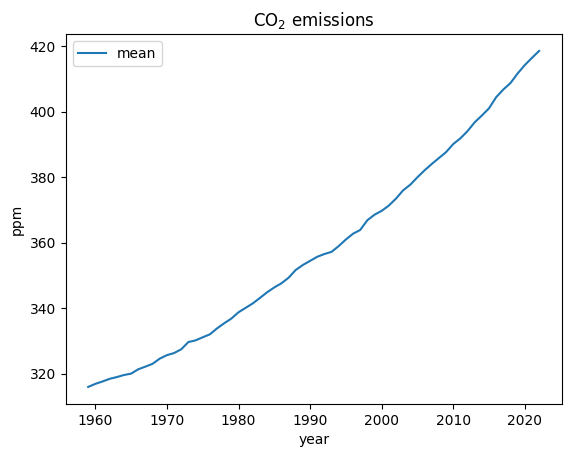

In [92]:
df_annual.plot(x="year", y="mean", ylabel="ppm", title="CO$_2$ emissions")

In [93]:
df_country = pd.read_html(
    "https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0
)[0]
df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18%
2,United States,5011686600,-2.01%,327210198,15.32,14.02%
3,India,2533638100,4.71%,1338636340,1.89,7.09%
4,Russia,1661899300,-2.13%,145109157,11.45,4.65%
5,Japan,1239592060,-1.21%,126993857,9.76,3.47%


In [94]:
df_country = df_country.rename({"Share  of world": "World percentage"}, axis=1)
df_country["World percentage"] = (
    df_country["World percentage"].str.rstrip("%").astype(float)
)
df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18
2,United States,5011686600,-2.01%,327210198,15.32,14.02
3,India,2533638100,4.71%,1338636340,1.89,7.09
4,Russia,1661899300,-2.13%,145109157,11.45,4.65
5,Japan,1239592060,-1.21%,126993857,9.76,3.47


<Axes: xlabel='Country'>

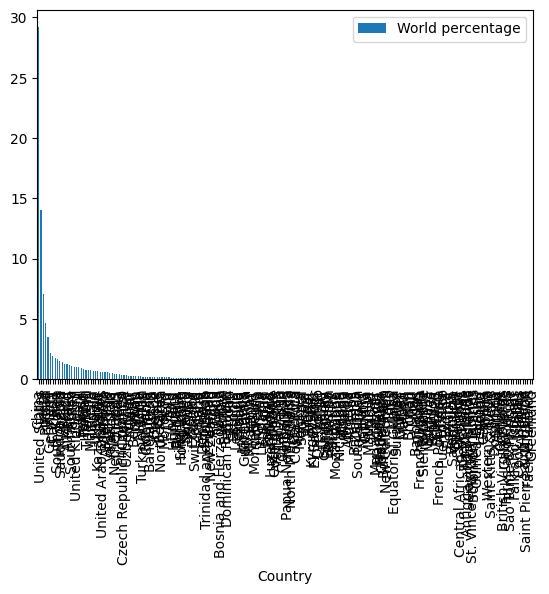

In [95]:
# whoops too much information
df_country.plot(kind="bar", x="Country", y="World percentage")

<Axes: xlabel='Country'>

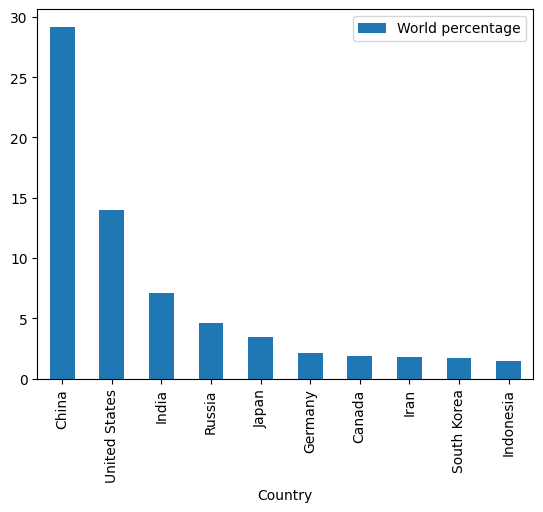

In [96]:
# maybe show top emitter?
df_country.head(10).plot(kind="bar", x="Country", y="World percentage")

<div style="max-width:66ch;">

## Remove clutter

We start by examining the line chart, and can notice some clutter, which makes the visual not stand out. For example the borders are strong color and the actual data visualisation (the line) is somewhat hidden. It doesn't stand out. Also the legend from default pandas plotting is very irrelevant and the variable is wrong. It also makes the user move the eye from top left to center.

</div>


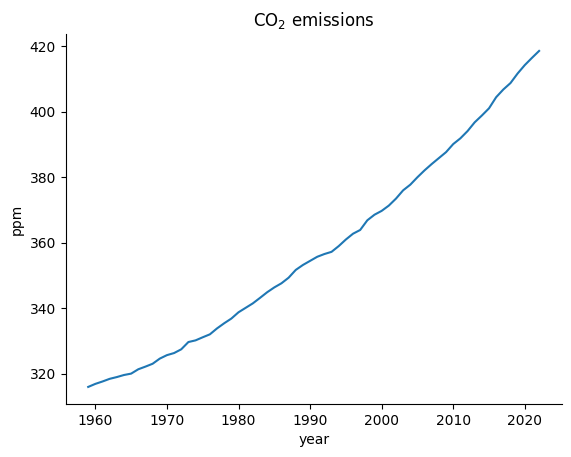

In [97]:
ax_annual = df_annual.plot(x="year", y="mean", ylabel="ppm", title="CO$_2$ emissions")

# no need for top and bottom spines
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)

# remove legend
ax_annual.legend().set_visible(False)

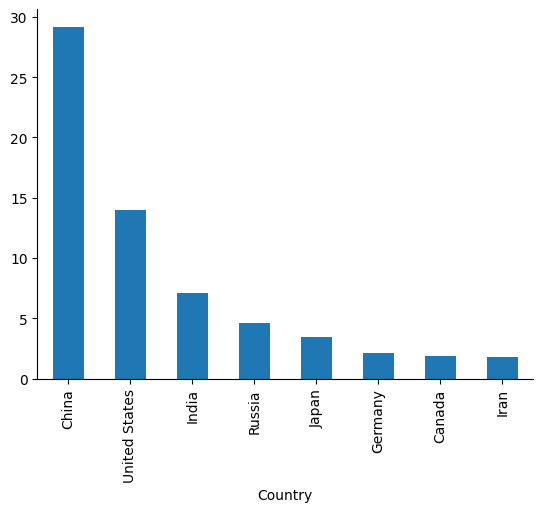

In [98]:
# choose 8 largest emitters
ax_percentage = df_country.head(8).plot(kind="bar", x="Country", y="World percentage")

# no need for top and bottom spines
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)

# remove legend
ax_percentage.legend().set_visible(False)

<div style="max-width:66ch;">

## Attention ...

I was going to write attention is all you need in the title, however that is a famous article for the transformer network, which we'll come back to in a deep learning course. Here attention is referred to making your visuals clearly mark the thing you want the audience to focus their attention towards. A way to achieve this is to use color sparingly and in a strategic way.

## Contrast

We'll be using contrast in order to attract attention. The axis information will have low contrast to the background while the important information will have higher contrast compared to the background. For the bar chart contrast will be used to direct audience towards the top three emitters.

## Descriptive title and labels

The norm has been a short title and labels, which are not descriptive enough and doesn't add much information to the visuals. Here we'll use a descriptive title that conveys our message.

</div>


<Axes: title={'left': 'The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959'}, xlabel='YEARS FROM 1959', ylabel='CO$_2$ MOLE FRACTON IN PPM'>

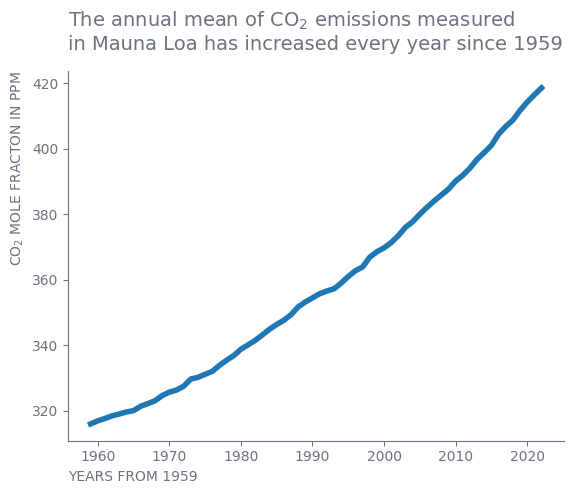

In [108]:
ax_annual = df_annual.plot(x="year", y="mean", linewidth=4)

GRAY1 = "#6b7280"

# no need for top and bottom spines
ax_annual.tick_params(axis="both", colors=GRAY1)
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.spines["left"].set_color(GRAY1)
ax_annual.spines["bottom"].set_color(GRAY1)

ax_annual.set_xlabel("YEARS FROM 1959", loc="left", color=GRAY1)
ax_annual.set_ylabel(r"CO$_2$ MOLE FRACTON IN PPM", loc="top", color=GRAY1)
ax_annual.set_title(
    "The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959",
    loc="left",
    pad=15,
    color=GRAY1,
    fontsize=14,
)

# remove legend
ax_annual.legend().set_visible(False)

# remove legend
ax_annual

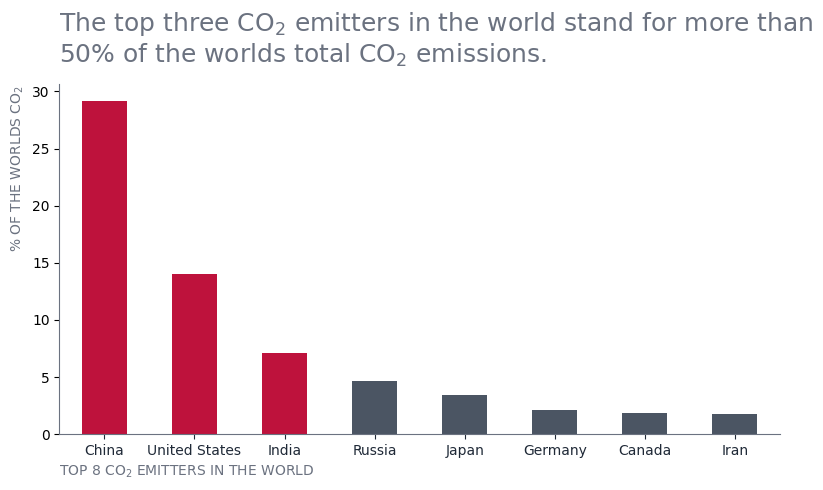

In [104]:
number_countries = 8
top_emitter = 3
red, gray = "#be123c", "#4b5563"
colors = [red] * top_emitter + [gray] * (number_countries - top_emitter)

ax_country = df_country.head(number_countries).plot(
    kind="bar", y="World percentage", x="Country", rot=0, color=colors
)
ax_country.legend().set_visible(False)

ax_country.set_xlabel("TOP 8 CO$_2$ EMITTERS IN THE WORLD", loc="left", color=GRAY1)
ax_country.set_ylabel("% OF THE WORLDS CO$_2$ ", loc="top", color=GRAY1)
ax_country.tick_params(axis="x", colors="#1f2937")

ax_country.set_title(
    "The top three CO$_2$ emitters in the world stand for more than\n50% of the worlds total CO$_2$ emissions.",
    loc="left",
    pad=15,
    color=GRAY1,
    fontsize=18,
)
ax_annual.tick_params(axis="both", colors=GRAY1)
ax_country.spines["top"].set_visible(False)
ax_country.spines["right"].set_visible(False)
ax_country.spines["left"].set_color(GRAY1)
ax_country.spines["bottom"].set_color(GRAY1)

fig = ax_country.get_figure()

fig.set_size_inches(8, 5)
fig.tight_layout()

<div style="max-width:66ch;">

## Summary

In this lecture note we've covered the basics in styling your visuals for better storytelling. This is done by removing clutter, focusing attention, working with colors and contrast. There are more concepts but we haven't covered them all in this lecture note.

</div>


<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
